In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [3]:
os.listdir("../garbage_classification_enhanced")

['paper',
 'green-glass',
 'clothes',
 'metal',
 'cardboard',
 'trash',
 'biological',
 'white-glass',
 'battery',
 'brown-glass',
 'plastic',
 'shoes']

### Creating a Dataframe

In [11]:
data = pd.DataFrame()
path = "../garbage_classification_enhanced/"
for category in os.listdir(path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['target'] = category
    i = 0
    for photo in os.listdir(path + category):
        temp.loc[i, 'path'] = path + category + "/" + photo
        temp.loc[i, 'filename'] = category + "/" + photo
        temp.loc[i, 'target'] = category
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp

In [12]:
data

,path,target,filename
0,../garbage_classification_enhanced/paper/paper...,paper,paper/paper903.jpg
1,../garbage_classification_enhanced/paper/paper...,paper,paper/paper917.jpg
2,../garbage_classification_enhanced/paper/paper...,paper,paper/paper724.jpg
3,../garbage_classification_enhanced/paper/paper...,paper,paper/paper730.jpg
4,../garbage_classification_enhanced/paper/paper...,paper,paper/paper1113.jpg
...,...,...,...
15865,../garbage_classification_enhanced/shoes/shoes...,shoes,shoes/shoes532.jpg
15866,../garbage_classification_enhanced/shoes/shoes...,shoes,shoes/shoes254.jpg
15867,../garbage_classification_enhanced/shoes/shoes...,shoes,shoes/shoes240.jpg
15868,../garbage_classification_enhanced/shoes/shoes...,shoes,shoes/shoes1399.jpg


### Displaying a random image 

../garbage_classification_enhanced/shoes/shoes1247.jpg


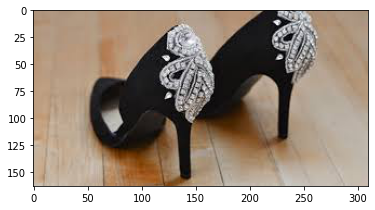

../garbage_classification_enhanced/white-glass/white-glass535.jpg


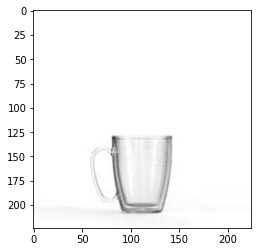

../garbage_classification_enhanced/clothes/clothes4138.jpg


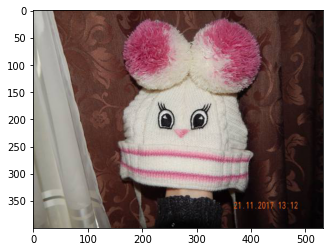

../garbage_classification_enhanced/shoes/shoes156.jpg


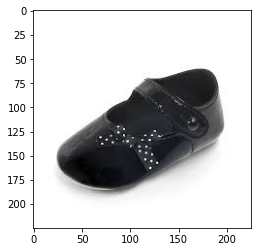

../garbage_classification_enhanced/green-glass/green-glass251.jpg


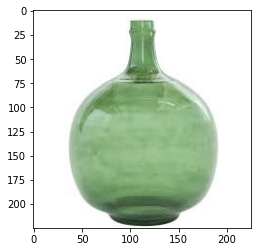

../garbage_classification_enhanced/shoes/shoes129.jpg


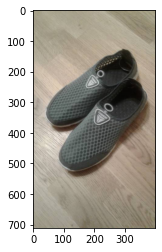

../garbage_classification_enhanced/paper/paper424.jpg


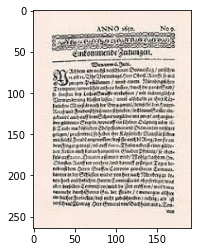

../garbage_classification_enhanced/green-glass/green-glass33.jpg


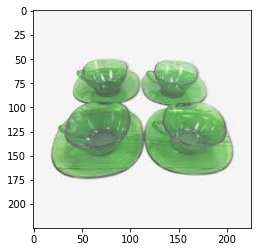

../garbage_classification_enhanced/brown-glass/brown-glass14.jpg


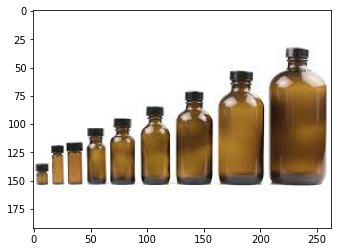

../garbage_classification_enhanced/clothes/clothes368.jpg


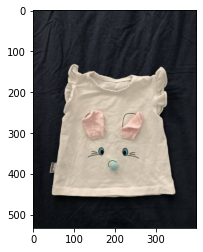

In [13]:
import random
import matplotlib.image as mpimg

for i in range (10):
    random_row = random.randint(0, len(data)-1)
    sample = data.iloc[random_row]
    image = mpimg.imread(sample['path'])
    plt.imshow(image)
    print(sample['path'])
    plt.show()

### Checking counts 

In [14]:
total_counts = 0

for category in os.listdir(path):
    count_class = 0
    for photo in os.listdir(path + category):
        count_class += 1
        total_counts += 1
    print(str(category) + " has " + str(count_class) + " photos")

paper has 1108 photos
green-glass has 641 photos
clothes has 5286 photos
metal has 837 photos
cardboard has 936 photos
trash has 726 photos
biological has 1035 photos
white-glass has 796 photos
battery has 979 photos
brown-glass has 619 photos
plastic has 901 photos
shoes has 2006 photos


### Pre-processing data
Dataset has imbalanced data, need to sample down some from clothes and shoes class to make it balanced

In [15]:
clothesDrop = data[data['target']=='clothes'].sample(n=4200)
shoesDrop = data[data['target']=='shoes'].sample(n=1000)

In [16]:
data.drop(labels=clothesDrop.index.values, inplace=True)
data.drop(labels=shoesDrop.index.values, inplace=True)
data['target'].value_counts()

paper          1108
clothes        1086
biological     1035
shoes          1006
battery         979
cardboard       936
plastic         901
metal           837
white-glass     796
trash           726
green-glass     641
brown-glass     619
Name: target, dtype: int64

### Modelling 

In [17]:
im_shape = (224, 224)
batch_size = 32
seed = 42

In [18]:
len(data)

10670

### Train test split 

In [20]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

len(train_df), len(test_df)

(8536, 2134)

In [23]:
data_dir = path

# List all image files in the subdirectories and assign labels
image_files = []
labels = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg'):
                image_files.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42)

In [24]:
len(image_files)

15870

In [28]:
total_counts = 0

for category in os.listdir(path):
    count_class = 0
    for photo in os.listdir(path + category):
        count_class += 1
        total_counts += 1
    print(str(category) + " has " + str(count_class) + " images")

paper has 1108 images
green-glass has 641 images
clothes has 5286 images
metal has 837 images
cardboard has 936 images
trash has 726 images
biological has 1035 images
white-glass has 796 images
battery has 979 images
brown-glass has 619 images
plastic has 901 images
shoes has 2006 images


In [29]:
image_files[0]

'../garbage_classification_enhanced/paper/paper903.jpg'

In [35]:
data = pd.DataFrame()
path = "../garbage_classification_enhanced/"
for category in os.listdir(path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['target'] = category
    i = 0
    for photo in os.listdir(path + category):
        temp.loc[i, 'path'] = path + category + "/" + photo
        temp.loc[i, 'filename'] = category + "/" + photo
        temp.loc[i, 'target'] = category
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp

In [36]:
len(data)

15870

In [37]:
clothesDrop = data[data['target']=='clothes'].sample(n=4200)
shoesDrop = data[data['target']=='shoes'].sample(n=1000)

In [38]:
data.drop(labels=clothesDrop.index.values, inplace=True)
data.drop(labels=shoesDrop.index.values, inplace=True)
data['target'].value_counts()

paper          1108
clothes        1086
biological     1035
shoes          1006
battery         979
cardboard       936
plastic         901
metal           837
white-glass     796
trash           726
green-glass     641
brown-glass     619
Name: target, dtype: int64

In [39]:
len(data)

10670

In [41]:
# List all image files in the subdirectories and assign labels
image_files = []
labels = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg'):
                image_files.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

In [42]:
# Apply oversampling to balance the classes
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(np.array(image_files).reshape(-1, 1), labels)

In [43]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [44]:
# Flatten the resampled data
X_train = X_train.flatten()
X_test = X_test.flatten()

### Image Augmentation 

In [46]:
# Set parameters for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [47]:
# Load and augment the training data
train_generator = datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': X_train, 'label': y_train}),
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),  # VGG16 input size
    batch_size=64,
    class_mode='categorical'
)

Found 50745 validated image filenames belonging to 12 classes.


In [48]:
# Load the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': X_test, 'label': y_test}),
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 12687 validated image filenames belonging to 12 classes.


### Model Training 

In [49]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [50]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

In [51]:
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(12, activation='softmax')(x)  # 12 classes

In [52]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [53]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
     79/Unknown - 780s 10s/step - loss: 1.6237 - accuracy: 0.4956

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

## Experiment 2 

In [57]:
from imblearn.under_sampling import RandomUnderSampler

# Define the data directory containing 12 subdirectories (one for each class)
data_dir = path

In [58]:
# List all image files in the subdirectories and assign labels
image_files = []
labels = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg'):
                image_files.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

In [59]:
# Apply undersampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(np.array(image_files).reshape(-1, 1), labels)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [60]:
# Flatten the resampled data
X_train = X_train.flatten()
X_test = X_test.flatten()

In [61]:
# Set parameters for data augmentation (optional but recommended)
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [62]:
# Load and augment the training data
train_generator = datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': X_train, 'label': y_train}),
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),  # VGG16 input size
    batch_size=64,
    class_mode='categorical'
)

Found 5942 validated image filenames belonging to 12 classes.


In [63]:
# Load the test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': X_test, 'label': y_test}),
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 1486 validated image filenames belonging to 12 classes.


In [64]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

In [65]:
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(12, activation='softmax')(x)  # 12 classes

In [66]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [67]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [68]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
      5/Unknown - 78s 16s/step - loss: 2.4102 - accuracy: 0.1937